# Colab Example


In [89]:
# usual preamble. Ignore for now...

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)


# This is necessary to show lots of columns in pandas
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

# As an aside if you want to see your pandas version ucomment the following:
pd.__version__
# I'm using versin 1.0.5

'1.1.5'

## Load CSV

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of **311 service requests** from [ NYC Open Data.](https://opendata.cityofnewyork.us/)


In [90]:
import pandas as pd

complaints = pd.read_csv('https://raw.githubusercontent.com/GusSand/itp_talk_2016/master/data/311-service-requests.csv')
complaints.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers. For now we're going to ignore it and hope we don't run into a problem, but in the long run we'd need to investigate this warning.



## What's in it? 

We get a DataFrame. A dataframe is one of the basic Pandas data structures. It represents a spreadsheet-like data structure containing an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc). It has a bunch of useful methods that we will play with.

In [91]:
complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"


In [92]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      111069 non-null  int64  
 1   Created Date                    111069 non-null  object 
 2   Closed Date                     60270 non-null   object 
 3   Agency                          111069 non-null  object 
 4   Agency Name                     111069 non-null  object 
 5   Complaint Type                  111069 non-null  object 
 6   Descriptor                      110613 non-null  object 
 7   Location Type                   79022 non-null   object 
 8   Incident Zip                    98807 non-null   object 
 9   Incident Address                84441 non-null   object 
 10  Street Name                     84432 non-null   object 
 11  Cross Street 1                  84728 non-null   object 
 12  Cross Street 2  

With the info we can see that we have 111K rows and 52 columns. That's pretty big! A few of the variables have complete values (Created Data, Agency, Borough, etc). A few others have a bunch of nulls (non values) in the colums (Closed Date, Location Type, Incident Zip)..

## Selecting rows and columns


In [93]:
complaints['Complaint Type']

0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

## Slices

To get the first 5 rows of a dataframe, we can use a slice: df[:5]. This is a great way to get a sense for what kind of information is in the dataframe -- take a minute to look at the contents and get a feel for this dataset.


In [94]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


we can also just get the first 5 rows of a column:

In [95]:
complaints['Complaint Type'][:10]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
5         Noise - Commercial
6           Blocked Driveway
7         Noise - Commercial
8         Noise - Commercial
9         Noise - Commercial
Name: Complaint Type, dtype: object

## Selecting multiple columns

What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.


In [96]:
complaints[['Complaint Type', 'Borough']][:5]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN


## What's the most common complaint type

Turns out that with Pandas this is a really easy question to answer! There's a **.value_counts()** method that we can use and it's probably one of the **most useful** Pandas methods.

In [97]:
complaints['Complaint Type'].value_counts()

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
DHS Income Savings Requirement        1
Municipal Parking Facility            1
DWD                                   1
Trans Fat                             1
Snow                                  1
Name: Complaint Type, Length: 165, dtype: int64

If we just wanted the top 10 most common complaints, we can do this:

In [98]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

We can even plot them !!

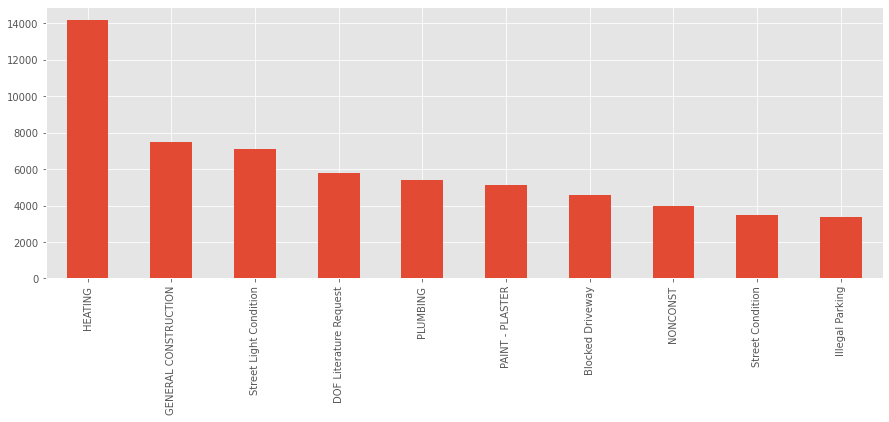

In [99]:
complaint_counts[:10].plot(kind='bar')

## Which Borough has the most rats ?

I'd like to know which borough has the most Rats. First we need to take a look at the data to see what it looks like

In [100]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


To get the rat complaints, we need to find the rows where the "Complaint Type" column is "Rodents".

In [101]:
rat_complaints = complaints[complaints['Complaint Type'] == 'Rodent']
rat_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
14,26590917,10/31/2013 01:19:54 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Mixed Use Building,11219,63 STREET,63 STREET,13 AVENUE,14 AVENUE,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,NaN,Pending,11/30/2013 01:19:54 AM,10/31/2013 01:29:26 AM,10 BROOKLYN,BROOKLYN,984467.0,167519.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.626477,-73.999218,"(40.6264774690411, -73.99921826202639)"
104,26593903,10/30/2013 11:30:37 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,10065,210 EAST 67 STREET,EAST 67 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Pending,11/29/2013 11:30:37 PM,10/30/2013 11:32:56 PM,08 MANHATTAN,MANHATTAN,994655.0,218478.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.766342,-73.962437,"(40.76634192531301, -73.96243748655138)"


If you look at rat_complaints, you'll see that it worked, and it only contains complaints with the right complaint type. But how does it work ?

In [102]:
complaints['Complaint Type'] == 'Rodent'

0         False
1         False
2         False
3         False
4          True
          ...  
111064    False
111065    False
111066    False
111067    False
111068    False
Name: Complaint Type, Length: 111069, dtype: bool

This is a big array of True/False, one for each row in our DataFrame. When we index our dataframe with this array, we get just the rows where our boolean evaluated to True.

You can also combine more than one condition with the & operator like:

In [103]:
is_rat = complaints['Complaint Type'] == 'Rodent'
in_brooklyn = complaints['Borough'] == 'BROOKLYN'
complaints[is_rat & in_brooklyn].head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
14,26590917,10/31/2013 01:19:54 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Mixed Use Building,11219,63 STREET,63 STREET,13 AVENUE,14 AVENUE,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,NaN,Pending,11/30/2013 01:19:54 AM,10/31/2013 01:29:26 AM,10 BROOKLYN,BROOKLYN,984467.0,167519.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.626477,-73.999218,"(40.6264774690411, -73.99921826202639)"
113,26592036,10/30/2013 11:23:20 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Mixed Use Building,11249,333 KENT AVENUE,KENT AVENUE,SOUTH 4 STREET,SOUTH 5 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Pending,11/29/2013 11:23:20 PM,10/30/2013 11:25:36 PM,01 BROOKLYN,BROOKLYN,993267.0,199095.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.713142,-73.967474,"(40.71314193383838, -73.96747420978451)"
119,26590227,10/30/2013 11:18:31 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Mixed Use Building,11249,20 SOUTH 4 STREET,SOUTH 4 STREET,KENT AVENUE,WYTHE AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Pending,11/29/2013 11:18:31 PM,10/30/2013 11:20:17 PM,01 BROOKLYN,BROOKLYN,993350.0,199125.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.713224,-73.967175,"(40.71322419170144, -73.96717477471884)"
124,26589210,10/30/2013 11:15:21 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,11233,924 HERKIMER STREET,HERKIMER STREET,KANE PLACE,COLUMBUS PLACE,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Pending,11/29/2013 11:15:21 PM,10/30/2013 11:23:24 PM,03 BROOKLYN,BROOKLYN,1005595.0,186365.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.678180,-73.923045,"(40.67817990006025, -73.9230454588185)"
129,26593905,10/30/2013 11:12:13 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,3+ Family Apt. Building,11249,337 KENT AVENUE,KENT AVENUE,SOUTH 4 STREET,SOUTH 5 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Pending,11/29/2013 11:12:13 PM,10/30/2013 11:14:57 PM,01 BROOKLYN,BROOKLYN,993254.0,199059.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.713043,-73.967521,"(40.71304313566539, -73.96752115104931)"



Or if we just wanted a few columns:



In [104]:
complaints[is_rat & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
14,Rodent,BROOKLYN,10/31/2013 01:19:54 AM,Rat Sighting
113,Rodent,BROOKLYN,10/30/2013 11:23:20 PM,Condition Attracting Rodents
119,Rodent,BROOKLYN,10/30/2013 11:18:31 PM,Condition Attracting Rodents
124,Rodent,BROOKLYN,10/30/2013 11:15:21 PM,Condition Attracting Rodents
129,Rodent,BROOKLYN,10/30/2013 11:12:13 PM,Condition Attracting Rodents
209,Rodent,BROOKLYN,10/30/2013 10:20:46 PM,Signs of Rodents
279,Rodent,BROOKLYN,10/30/2013 09:30:06 PM,Rat Sighting
448,Rodent,BROOKLYN,10/30/2013 07:58:55 PM,Rat Sighting
566,Rodent,BROOKLYN,10/30/2013 06:40:01 PM,Mouse Sighting
1089,Rodent,BROOKLYN,10/30/2013 03:50:44 PM,Rat Sighting


## But really which Borough has the most rats?



In [105]:
rat_complaints = complaints[is_rat]
rat_complaints['Borough'].value_counts()

BROOKLYN         467
BRONX            456
MANHATTAN        372
QUEENS           250
STATEN ISLAND     87
Name: Borough, dtype: int64

What if you want it plotted ?

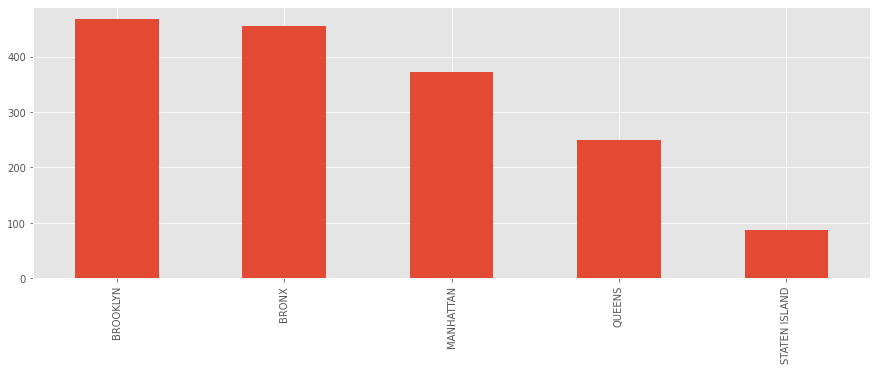

In [106]:
rat_complaints['Borough'].value_counts().plot(kind='bar')

Now it's your turn. Can you find which borough has the most 'Dirty Conditions' ?

In [107]:
#complaints[complaints['Complaint type'=='Dirty Conditions']].value_counts()
dirty = complaints['Complaint Type'] == 'Dirty Conditions'
dirtydf = complaints[dirty][['Complaint Type', 'Borough']][:10]
dirtydf['Borough'].value_counts()

BRONX        5
MANHATTAN    3
QUEENS       2
Name: Borough, dtype: int64

# **Homework 1**

### the different agencies that have recieved complaints

In [108]:
# the different agencies that have recieved complaints
agency = complaints[['Agency','Agency Name', 'Borough']]
agency.head()

,Agency,Agency Name,Borough
0,NYPD,New York City Police Department,QUEENS
1,NYPD,New York City Police Department,QUEENS
2,NYPD,New York City Police Department,MANHATTAN
3,NYPD,New York City Police Department,MANHATTAN
4,DOHMH,Department of Health and Mental Hygiene,MANHATTAN


In [109]:
agency['Agency Name'].value_counts()

Department of Housing Preservation and Development    39067
Department of Transportation                          17706
New York City Police Department                       15295
Department of Environmental Protection                 8896
Department of Finance                                  5795
                                                      ...  
OMB                                                       1
School - PS 197 The Ocean School                          1
School - PS 19 Judith K Weiss                             1
School - PS 138                                           1
School - IS 285 Meyer Levin                               1
Name: Agency Name, Length: 135, dtype: int64

In [110]:
agency['Borough'].value_counts()

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: Borough, dtype: int64

# Open (status) complaints with location as street/sidewalk handled by NYPD in Queens




In [111]:
comp = complaints[complaints['Location Type'] == 'Street/Sidewalk']
comp[:10]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,109 STREET,107 AVENUE,109 AVENUE,NaN,NaN,ADDRESS,SOUTH RICHMOND HILL,NaN,Precinct,Assigned,10/31/2013 09:46:40 AM,10/31/2013 01:59:51 AM,10 QUEENS,QUEENS,1030919.0,187622.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
12,26594169,10/31/2013 01:20:57 AM,10/31/2013 02:12:31 AM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Vehicle,Street/Sidewalk,10029,65 EAST 99 STREET,EAST 99 STREET,MADISON AVENUE,PARK AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:20:57 AM,10/31/2013 01:42:05 AM,11 MANHATTAN,MANHATTAN,997470.0,226725.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.788974,-73.952259,"(40.78897400211689, -73.95225898702977)"
13,26594391,10/31/2013 01:20:13 AM,NaN,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,10466,NaN,NaN,NaN,NaN,STRANG AVENUE,AMUNDSON AVENUE,INTERSECTION,BRONX,NaN,Precinct,Open,10/31/2013 09:20:13 AM,NaN,12 BRONX,BRONX,1029467.0,264124.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,

In [122]:
lo = complaints['Borough'] == 'QUEENS'
ny = complaints['Agency'] == 'NYPD'


In [124]:
df1= complaints[lo & ny]
df1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,109 STREET,107 AVENUE,109 AVENUE,NaN,NaN,ADDRESS,SOUTH RICHMOND HILL,NaN,Precinct,Assigned,10/31/2013 09:46:40 AM,10/31/2013 01:59:51 AM,10 QUEENS,QUEENS,1030919.0,187622.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,CROSSBAY BOULEVARD,PITKIN AVENUE,VAN WICKLEN ROAD,NaN,NaN,ADDRESS,OZONE PARK,NaN,Precinct,Closed,10/31/2013 09:44:19 AM,10/31/2013 01:58:49 AM,10 QUEENS,QUEENS,1027776.0,184076.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"


In [125]:
df2 = df1[df1['Status'] == 'Open']
df2

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
22,26589678,10/31/2013 12:39:55 AM,NaN,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11419,NaN,NaN,NaN,NaN,112 STREET,ATLANTIC AVENUE,INTERSECTION,SOUTH RICHMOND HILL,NaN,Precinct,Open,10/31/2013 08:39:55 AM,NaN,09 QUEENS,QUEENS,1030314.0,191578.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.692394,-73.833891,"(40.69239424979043, -73.8338912453996)"
39,26593840,10/31/2013 12:19:48 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11379,78-41 68 ROAD,68 ROAD,78 STREET,79 STREET,NaN,NaN,ADDRESS,MIDDLE VILLAGE,NaN,Precinct,Open,10/31/2013 08:19:48 AM,NaN,05 QUEENS,QUEENS,1019062.0,198120.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710402,-73.874433,"(40.71040190143904, -73.8744325577748)"
77,26590412,10/30/2013 11:49:10 PM,NaN,NYPD,New York City Police Department,Drinking,In Public,Street/Sidewalk,11418,135-16 JAMAICA AVENUE,JAMAICA AVENUE,METROPOLITAN AVENUE,VAN WYCK EXPRESSWAY,NaN,NaN,ADDRESS,RICHMOND HILL,NaN,Precinct,Open,10/31/2013 07:49:10 AM,NaN,09 QUEENS,QUEENS,1034900.0,195238.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702415,-73.817326,"(40.70241501845674, -73.81732645592662)"
84,26593111,10/30/2013 11:43:08 PM,NaN,NYPD,New York City Police Department,Panhandling,NaN,Street/Sidewalk,11418,135-16 JAMAICA AVENUE,JAMAICA AVENUE,METROPOLITAN AVENUE,VAN WYCK EXPRESSWAY,NaN,NaN,ADDRESS,RICHMOND HILL,NaN,Precinct,Open,10/31/2013 07:43:08 AM,NaN,09 QUEENS,QUEENS,1034900.0,195238.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702415,-73.817326,"(40.70241501845674, -73.81732645592662)"
90,26592565,10/30/2013 11:39:28 PM,NaN,N

# Dropping few unwanted columns
#### Dropping "closed date" column because it has no significance in an open case

In [126]:
# dropping closed date column because it has no signofocance in an open case
df3 = df2.drop(['Closed Date'], axis = 1)
df3

,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
1,26593698,10/31/2013 02:01:04 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
5,26592370,10/31/2013 01:46:52 AM,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,NaN,Precinct,Open,10/31/2013 09:46:52 AM,NaN,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
22,26589678,10/31/2013 12:39:55 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11419,NaN,NaN,NaN,NaN,112 STREET,ATLANTIC AVENUE,INTERSECTION,SOUTH RICHMOND HILL,NaN,Precinct,Open,10/31/2013 08:39:55 AM,NaN,09 QUEENS,QUEENS,1030314.0,191578.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.692394,-73.833891,"(40.69239424979043, -73.8338912453996)"
39,26593840,10/31/2013 12:19:48 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11379,78-41 68 ROAD,68 ROAD,78 STREET,79 STREET,NaN,NaN,ADDRESS,MIDDLE VILLAGE,NaN,Precinct,Open,10/31/2013 08:19:48 AM,NaN,05 QUEENS,QUEENS,1019062.0,198120.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710402,-73.874433,"(40.71040190143904, -73.8744325577748)"
77,26590412,10/30/2013 11:49:10 PM,NYPD,New York City Police Department,Drinking,In Public,Street/Sidewalk,11418,135-16 JAMAICA AVENUE,JAMAICA AVENUE,METROPOLITAN AVENUE,VAN WYCK EXPRESSWAY,NaN,NaN,ADDRESS,RICHMOND HILL,NaN,Precinct,Open,10/31/2013 07:49:10 AM,NaN,09 QUEENS,QUEENS,1034900.0,195238.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702415,-73.817326,"(40.70241501845674, -73.81732645592662)"
84,26593111,10/30/2013 11:43:08 PM,NYPD,New York City Police Department,Panhandling,NaN,Street/Sidewalk,11418,135-16 JAMAICA AVENUE,JAMAICA AVENUE,METROPOLITAN AVENUE,VAN WYCK EXPRESSWAY,NaN,NaN,ADDRESS,RICHMOND HILL,NaN,Precinct,Open,10/31/2013 07:43:08 AM,NaN,09 QUEENS,QUEENS,1034900.0,195238.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702415,-73.817326,"(40.70241501845674, -73.81732645592662)"
90,26592565,10/30/2013 11:39:28 PM,NYPD,New York City Police Department,Panh

# Dropping multiple columns

In [127]:
df4 = df3.drop(['Landmark', 'Resolution Action Updated Date'], axis = 1)
df4

,Unique Key,Created Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Facility Type,Status,Due Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
1,26593698,10/31/2013 02:01:04 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,Precinct,Open,10/31/2013 10:01:04 AM,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
5,26592370,10/31/2013 01:46:52 AM,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,37 AVENUE,84 STREET,85 STREET,NaN,NaN,BLOCKFACE,JACKSON HEIGHTS,Precinct,Open,10/31/2013 09:46:52 AM,03 QUEENS,QUEENS,1016948.0,212540.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
22,26589678,10/31/2013 12:39:55 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11419,NaN,NaN,NaN,NaN,112 STREET,ATLANTIC AVENUE,INTERSECTION,SOUTH RICHMOND HILL,Precinct,Open,10/31/2013 08:39:55 AM,09 QUEENS,QUEENS,1030314.0,191578.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.692394,-73.833891,"(40.69239424979043, -73.8338912453996)"
39,26593840,10/31/2013 12:19:48 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11379,78-41 68 ROAD,68 ROAD,78 STREET,79 STREET,NaN,NaN,ADDRESS,MIDDLE VILLAGE,Precinct,Open,10/31/2013 08:19:48 AM,05 QUEENS,QUEENS,1019062.0,198120.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.710402,-73.874433,"(40.71040190143904, -73.8744325577748)"
77,26590412,10/30/2013 11:49:10 PM,NYPD,New York City Police Department,Drinking,In Public,Street/Sidewalk,11418,135-16 JAMAICA AVENUE,JAMAICA AVENUE,METROPOLITAN AVENUE,VAN WYCK EXPRESSWAY,NaN,NaN,ADDRESS,RICHMOND HILL,Precinct,Open,10/31/2013 07:49:10 AM,09 QUEENS,QUEENS,1034900.0,195238.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702415,-73.817326,"(40.70241501845674, -73.81732645592662)"
84,26593111,10/30/2013 11:43:08 PM,NYPD,New York City Police Department,Panhandling,NaN,Street/Sidewalk,11418,135-16 JAMAICA AVENUE,JAMAICA AVENUE,METROPOLITAN AVENUE,VAN WYCK EXPRESSWAY,NaN,NaN,ADDRESS,RICHMOND HILL,Precinct,Open,10/31/2013 07:43:08 AM,09 QUEENS,QUEENS,1034900.0,195238.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702415,-73.817326,"(40.70241501845674, -73.81732645592662)"
90,26592565,10/30/2013 11:39:28 PM,NYPD,New York City Police Department,Panhandling,NaN,Street/Sidewalk,11418,135-16 JAMAICA AVENUE,JAMAICA AVENUE,METROPOLITAN AVEN

# Bar graph showing different complaint types for street/sidewalk complaints

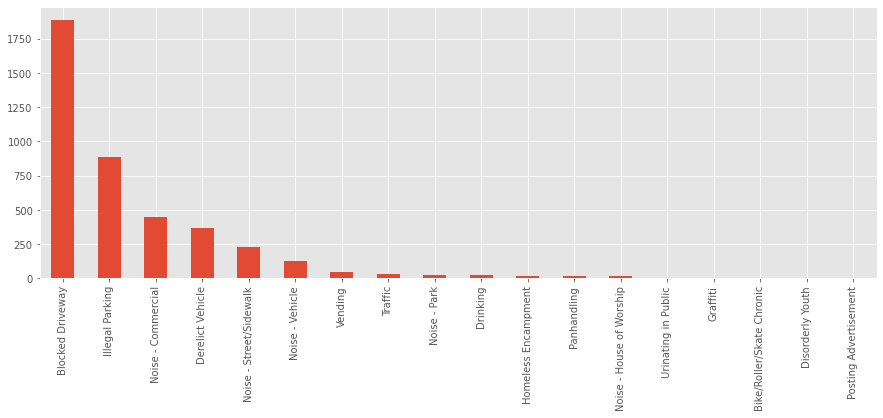

In [128]:
# Bar graph showing different complaint types for street/sidewalk complaints
cnts = df1['Complaint Type'].value_counts()
cnts.plot(kind='bar')

## **My Understanding:**
### -- By analysis of the dataset we can find different relations between the data which can answer many questions like, which borough had the most rodent problems? or which agency tackled a particular complaint or how many different types of complaints exists and so on.

### From the given data, we can find which street had the most complaints and due to what reasons these issues are arising, this might be useful while analysing questions like: 
#### Is the area/street safe? (any crimes or dangers)
#### Is it a good place to stay? (maintenace and infestations)
#### Is it a child/family-friendly neighbourhood? (based on the noise complaints) 
#### How effective is the agency (NYPD, DOMHM, etc..) near that area? (by considering the number of open, closed cases) and so on...

### -- What I understood from playing with datasets is that as a data scientist/analyst, we first need to define the question/problem statement that we would like to work with, after this it is easier to find relations between data and get the answers we are looking for.

### -- Another important aspect we should consider is how to tackle missing data, how often does it occur and how it affects the data we are dealing with.